#How to Use StandardScaler and MinMaxScaler Transforms in Python.

Many machine learning algorithms **perform better when numerical input variables are scaled to a standard range.**

This includes algorithms that use a weighted sum of the input, like **linear regression,** and algorithms that use distance measures, like **k-nearest neighbors.**

The two most popular techniques for scaling numerical data **prior to modeling** are normalization and standardization.

**Normalization** scales each input variable separately to the range 0-1, which is the range for floating-point values where we have the most precision.

**Standardization** scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

**Data scaling is a recommended pre-processing** step when working with many machine learning algorithms.

Data scaling can be achieved by **normalizing or standardizing** real-valued input and output variables.
****************************************************************************

#The Scale of Your Data Matters
Machine learning models learn a mapping from input variables to an output variable.

As such, the scale and distribution of the data drawn from the domain may be different for each variable.

Input variables may have different units **(e.g. feet, kilometers, and hours)** that, in turn, **may mean the variables have different scales.**

Differences in the scales across input variables may increase the difficulty of the problem being modeled. An example of this is that large input values (e.g. a spread of hundreds or thousands of units) can result in a model that learns large weight values. A model with large weight values is often unstable, meaning that it may suffer from poor performance during learning and sensitivity to input values **resulting in higher generalization error.**
***************************************************************************

#Numerical Data Scaling Methods
Both normalization and standardization can be achieved using the scikit-learn library.
*****************************************************************************
#Data Normalization
Normalization is a **rescaling of the data** from the original range so that all values are **within the new range of 0 and 1.**

Normalization requires that you know or are able to accurately estimate the **minimum and maximum observable values.** You may be able to estimate these values from your available data.

###Attributes are often normalized to lie in a fixed range — usually from zero to one—by dividing all values by the maximum value encountered or by subtracting the minimum value and dividing by the range between the maximum and minimum values.

A value is normalized as follows:

###y = (x – min) / (max – min)

Where the minimum and maximum values pertain to the value x being normalized.

For example, for a dataset, we could guesstimate the min and max observable values as 30 and -10. We can then normalize any value, like 18.8, as follows:

y = (x – min) / (max – min)

y = (18.8 – (-10)) / (30 – (-10))

y = 28.8 / 40

y = 0.72

#NOTE:
You can see that **if an x value** is provided that is **outside the bounds of the minimum and maximum values,** the resulting value will **not** be in the range of 0 and 1. You could check for these observations prior to making predictions and either remove them from the dataset or **limit them to the pre-defined maximum or minimum values.**


#You can normalize your dataset using the scikit-learn object **MinMaxScaler.**

Good practice usage with the MinMaxScaler and other scaling techniques is as follows:

**Fit the scaler using available training data.**

     For normalization, this means the training data will be used to estimate the minimum and maximum observable values. This is done by calling the fit() function.

**Apply the scale to training data.**

    This means you can use the normalized data to train your model. This is done by calling the transform() function.

**Apply the scale to data going forward.**

     This means you can prepare new data in the future on which you want to make predictions.

*****************************************************************************
The default scale for the MinMaxScaler is to rescale variables into the range [0,1], although a preferred scale can be specified via the **“feature_range”** argument and specify a tuple, including the min and the max for all variables.
***************************************************************************
#EXAMPLE:

We can demonstrate the usage of this class by converting two variables to a **range 0-to-1, the default range for normalization.** The first variable has values between about 4 and 100, the second has values between about 0.1 and
0.001.





In [4]:
# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

# define data
data = asarray([[100, 0.001],
				[8, 0.05],
				[50, 0.005],
				[88, 0.07],
				[4, 0.1]])
print(data)

# define min max scaler
scaler = MinMaxScaler()            #<---------------------------------------------

print("********************************************************")
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
********************************************************
[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]


###first reports the raw dataset, showing 2 columns with 5 rows. The values are in **scientific notation which can be hard to read** if you’re not used to it.

Next, the scaler is defined, **fit()** on the whole dataset and then used to create **a transformed** version of the dataset **with each column normalized independently.**


#Very Important Point:
##We can see that the **largest raw value for each column now has the value 1.0** and the **smallest value for each column now has the value 0.0.**

#Data Standardization
Standardizing a dataset involves rescaling the distribution of values so that the **mean of observed values is 0** and the **standard deviation is 1.**

#mean--------->0
#std------------->1

This can be thought of as **subtracting the mean value** or **centering the data.**

Like normalization, standardization can be useful, and even required in some machine learning algorithms **when your data has input values with differing scales.**

####Standardization assumes that your observations **fit a Gaussian distribution (bell curve)** with a well-behaved mean and standard deviation. You can still standardize your data if this expectation is not met, but you may not get reliable results.

###Technique is to calculate the statistical mean and standard deviation of the attribute values, **subtract the mean from each value,** and **divide the result by the standard deviation.** This process is called standardizing a statistical variable and results in a set of values whose **mean is zero** and **standard deviation is one.**

###Standardization requires that you know or are able to accurately estimate the mean and standard deviation of observable values. You may be able to estimate these values **from your training data,**     **not the entire dataset.**

##Again, it is emphasized that the statistics required for the transformation (e.g., the mean) are estimated from the **training set** and **are applied to all data sets** (e.g., the test set or new samples).

A value is standardized as follows:

#y = (x – mean) / standard_deviation
Where the mean is calculated as:

#mean = sum(x) / count(x)
And the standard_deviation is calculated as:

#standard_deviation = sqrt( sum( (x – mean)^2 ) / count(x))

We can guesstimate a mean of 10.0 and a standard deviation of about 5.0. Using these values, we can standardize the first value of 20.7 as follows:

y = (x – mean) / standard_deviation

y = (20.7 – 10) / 5

y = (10.7) / 5

y = 2.14

The mean and standard deviation estimates of a dataset can be **more robust to new data** than the minimum and maximum.

******************************************************************************
#Example:
We can demonstrate the usage of this class by converting two variables to a range 0-to-1 defined in the previous section. We will use the default configuration that will both center and scale the values in each column, e.g. full standardization.

In [5]:
# example of a standardization
from numpy import asarray
from sklearn.preprocessing import StandardScaler

# define data
data = asarray([[100, 0.001],
				[8, 0.05],
				[50, 0.005],
				[88, 0.07],
				[4, 0.1]])
print(data)

# define standard scaler
scaler = StandardScaler()  #<------------------------------------------------


print("***********************************************")
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
***********************************************
[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]


####first reports the raw dataset, showing 2 columns with 5 rows as before.

Next, the scaler is defined, **fit** on the whole dataset and then used to create **a transformed** version of the dataset with **each column standardized independently.**

#Very Important:
We can see that the **mean value in each column is assigned a value of 0.0** if present and the values are **centered** around 0.0 with values both positive and negative.

#Sonar Dataset

The sonar dataset is a standard machine learning dataset for binary classification.

It involves 60 real-valued inputs and a two-class target variable. There are 208 examples in the dataset and the classes are reasonably balanced.

A baseline classification algorithm can achieve a classification accuracy of about 53.4 percent using **repeated stratified 10-fold cross-validation.** Top performance on this dataset is about 88 percent using repeated stratified 10-fold cross-validation.

The dataset describes radar returns of rocks or simulated mines.

(208, 61)
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118

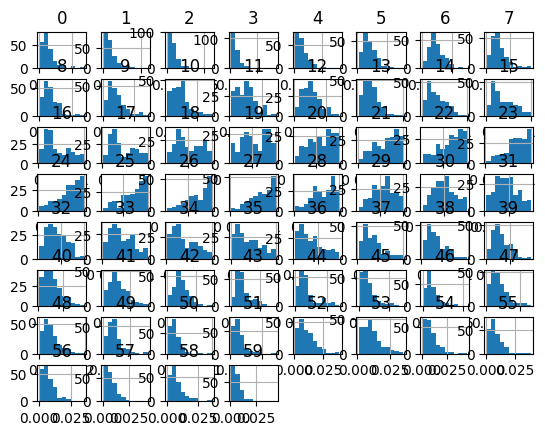

In [1]:
# load and summarize the sonar dataset
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)

# summarize the shape of the dataset
print(dataset.shape)

# summarize each variable
print(dataset.describe())

# histograms of the variables
dataset.hist()
pyplot.show()

#This confirms the 60 input variables, one output variable, and 208 rows of data.

A statistical summary of the input variables is provided showing that values are numeric and range approximately from 0 to 1.

Finally, a histogram is created for each input variable.

The dataset provides a good candidate for using scaler transforms as the variables have differing minimum and maximum values, as well as different data distributions.

We will use a **k-nearest neighbor algorithm** with **default hyperparameters** and evaluate it using **repeated stratified k-fold cross-validation.**

In [4]:
# evaluate knn on the raw sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot


# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values

# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
print(X)
print("***********************************************************************")
print(y)
print("************************************************************************")



# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
print(X)
print("************************************************************************")
print(y)
print("************************************************************************")



# define and configure the model
model = KNeighborsClassifier()


# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')


# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

[[0.02 0.0371 0.0428 ... 0.0084 0.009 0.0032]
 [0.0453 0.0523 0.0843 ... 0.0049 0.0052 0.0044]
 [0.0262 0.0582 0.1099 ... 0.0164 0.0095 0.0078]
 ...
 [0.0522 0.0437 0.018 ... 0.0138 0.0077 0.0031]
 [0.0303 0.0353 0.049 ... 0.0079 0.0036 0.0048]
 [0.026 0.0363 0.0136 ... 0.0036 0.0061 0.0115]]
***********************************************************************
['R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' '

#We can see that the model achieved a mean classification accuracy of about 79.7 percent.

#MinMaxScaler Transform
We can apply the **MinMaxScaler** to the Sonar dataset directly to normalize the input variables.

We will use the default configuration and scale values to the **range 0 and 1.** First, a MinMaxScaler instance is defined with default hyperparameters. Once defined, we can call the **fit_transform()** function and pass it to our dataset to create a transformed version of our dataset.

***********************dataset*******************************************
         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.06

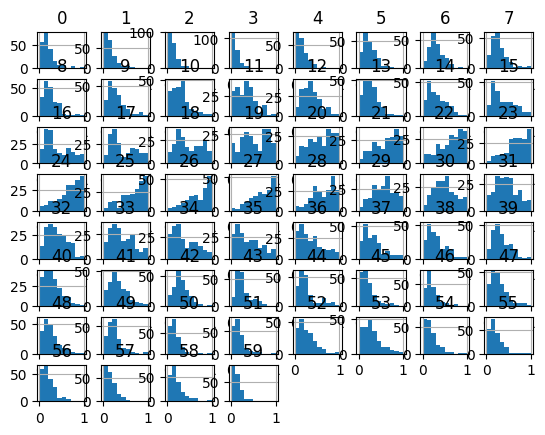

In [7]:
# visualize a minmax scaler transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot


# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
print("***********************dataset*******************************************")
print(dataset)


# retrieve just the numeric input values
data = dataset.values[:, :-1]
print("***********************data**********************************************")
print(data)

# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
data = trans.fit_transform(data)
print("***********************data with fit & transform************************")
print(data)
print("**********************************************************************")


# convert the array back to a dataframe
dataset = DataFrame(data)


# summarize
print(dataset.describe())


# histograms of the variables
dataset.hist()
pyplot.show()

We can see that the distributions have been adjusted and that the minimum and maximum values for each variable are now a crisp 0.0 and 1.0 respectively.


Histogram plots of the variables are created, although the distributions don’t look much different from their original distributions seen in the previous section.

In [10]:
# evaluate knn on the sonar dataset with minmax scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot


# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
print("***********************dataset*******************************************")
print(dataset)


data = dataset.values
print("***********************data*******************************************")
print(data)

# separate into input and output columns
X, y = data[:, :-1], data[:, -1]


# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
print("***********************X*******************************************")
print(X)
print("***********************y*******************************************")
print(y)

# define the pipeline
trans = MinMaxScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])


# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')


# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

***********************dataset*******************************************
         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.06

##MinMaxScaler help to increase accuracy to 81.3%.

#StandardScaler Transform
We can apply the **StandardScaler** to the Sonar dataset directly to standardize the input variables.

We will use the **default configuration** and **scale values to subtract the mean to center them on 0.0** and **divide by the standard deviation to give the standard deviation of 1.0.** First, a StandardScaler instance is defined with default hyperparameters.

Once defined, we can call the **fit_transform()** function and pass it to our dataset to create a transformed version of our dataset.

***********************dataset*******************************************
         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.06

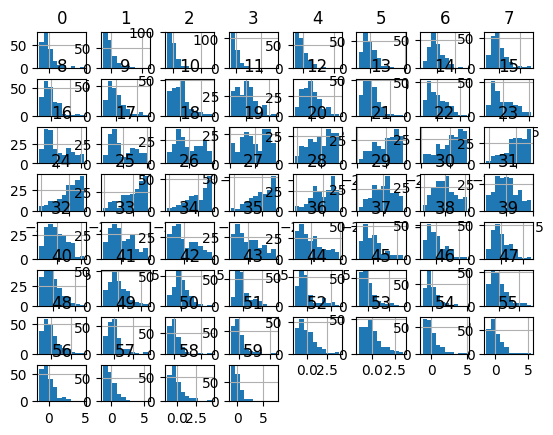

In [11]:
# visualize a standard scaler transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot


# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
print("***********************dataset*******************************************")
print(dataset)


# retrieve just the numeric input values
data = dataset.values[:, :-1]
print("***********************data*******************************************")
print(data)


# perform a robust scaler transform of the dataset
trans = StandardScaler()
data = trans.fit_transform(data)
print("***********************data fit and transform*******************************************")
print(data)

# convert the array back to a dataframe
dataset = DataFrame(data)


# summarize
print(dataset.describe())


# histograms of the variables
dataset.hist()
pyplot.show()

###We can see that the distributions have been adjusted and that the mean is a very small number close to zero and the standard deviation is very close to 1.0 for each variable.

In [12]:
# evaluate knn on the sonar dataset with standard scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot


# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values


# separate into input and output columns
X, y = data[:, :-1], data[:, -1]


# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))


# define the pipeline
trans = StandardScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])


# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')


# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.810 (0.080)


##Now StandardScaler made accuracy to 81.0%.

#Q. Should I Normalize or Standardize?
Whether input variables require scaling depends on the specifics of your problem and of each variable.

You may have a sequence of quantities as inputs, such as prices or temperatures.

If the **distribution of the quantity is normal,** then it should be **standardized,** otherwise, the data should be **normalized.** This applies if the range of quantity values is large (10s, 100s, etc.) or small (0.01, 0.0001).

If the quantity values are **small (near 0-1)** and the distribution is **limited** **(e.g. standard deviation near 1),** then perhaps you can get away with **no scaling** of the data.

#Q. Should I Standardize then Normalize?
Standardization can give **values that are both positive and negative centered around zero.**

###It may be desirable **to normalize data after it has been standardized.**

This might be a good idea of you have a mixture of standardized and normalized variables and wish all input variables to have the same minimum and maximum values as input for a given algorithm, such as an algorithm that calculates distance measures.

#Q. But Which is Best?
This is **unknowable.**

Evaluate models on data prepared with each transform and use the transform or combination of transforms that result in the best performance for your data set on your model.

